# Model to accurately predict whether the patients in the dataset have diabetes or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_set = pd.read_csv('C:/Users/Swapnil/Desktop/Data science/Project 2/Healthcare - Diabetes/health care diabetes.csv')
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Type of dataset
type(data_set)

pandas.core.frame.DataFrame

In [4]:
#shape of dataset
data_set.shape

(768, 9)

In [5]:
#Data types of different column values
dt = data_set.dtypes

In [6]:
# Finding the null values in the data set.
data_set.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# from above we can observe that we have 0 null values in the dataset

In [7]:
#Descriptive Analysis for 
'''Glucose
BloodPressure
SkinThickness
Insulin
BMI'''



'Glucose\nBloodPressure\nSkinThickness\nInsulin\nBMI'

0.17375350179188992


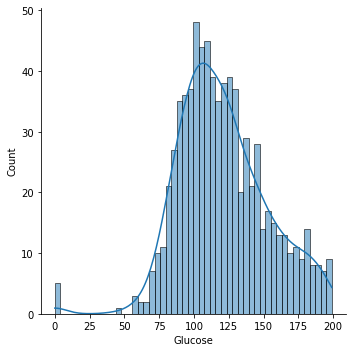

-1.8436079833551302


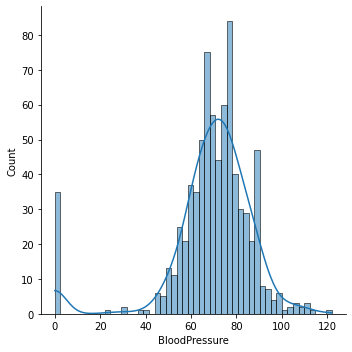

0.10937249648187608


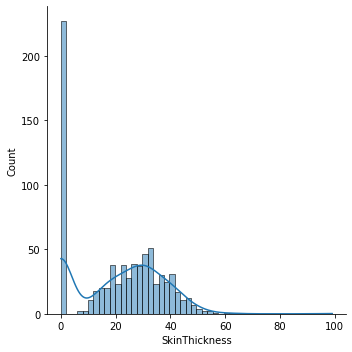

2.272250858431574


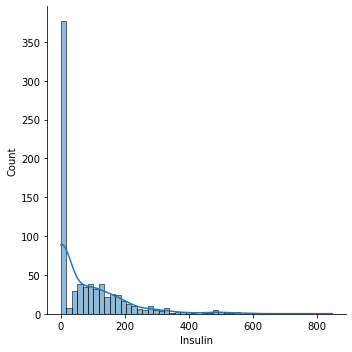

-0.42898158845356543


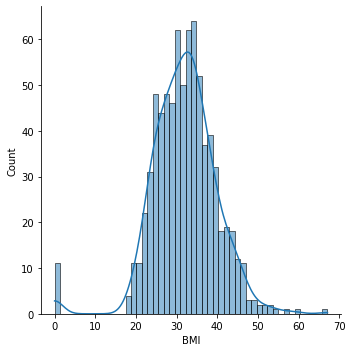

In [8]:
#creating the Histogram 

DA_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in DA_col:
    sns.displot(data_set[i], kde=True, bins=50)  # distplot is HISTOGRAM
    print(data_set[i].skew())
    plt.show()

# observation  : from above graph we can observe that all the graph are right skewed.

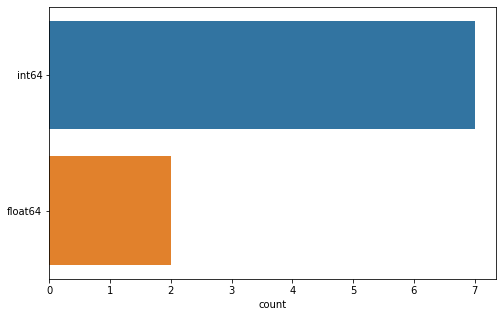

In [9]:
#count (frequency) plot describing the data types and the count of variables. 
plt.figure(figsize=(8,5))
sns.countplot(y = dt)
plt.show()

<AxesSubplot:>

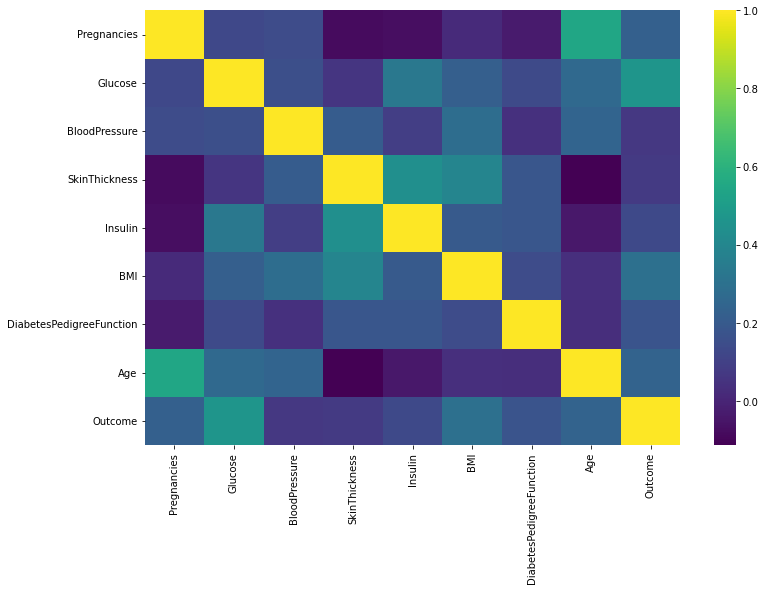

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data_set.corr() , cmap = 'viridis')

# from the above graph we can easily identify the correlation between the features

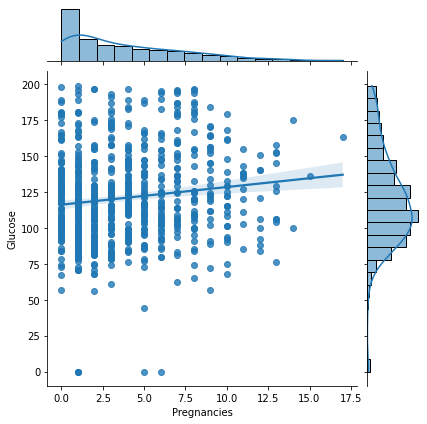

In [11]:
sns.jointplot('Pregnancies', 'Glucose' , data = data_set , kind ='reg')

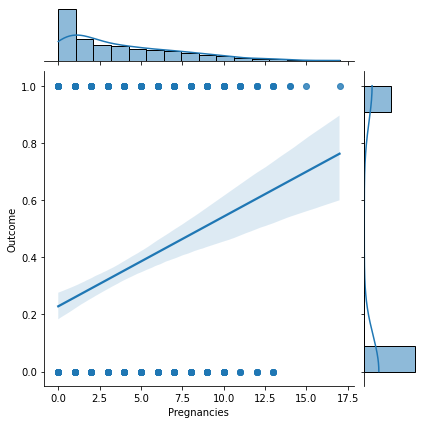

In [12]:
sns.jointplot('Pregnancies', 'Outcome' , data = data_set , kind ='reg')

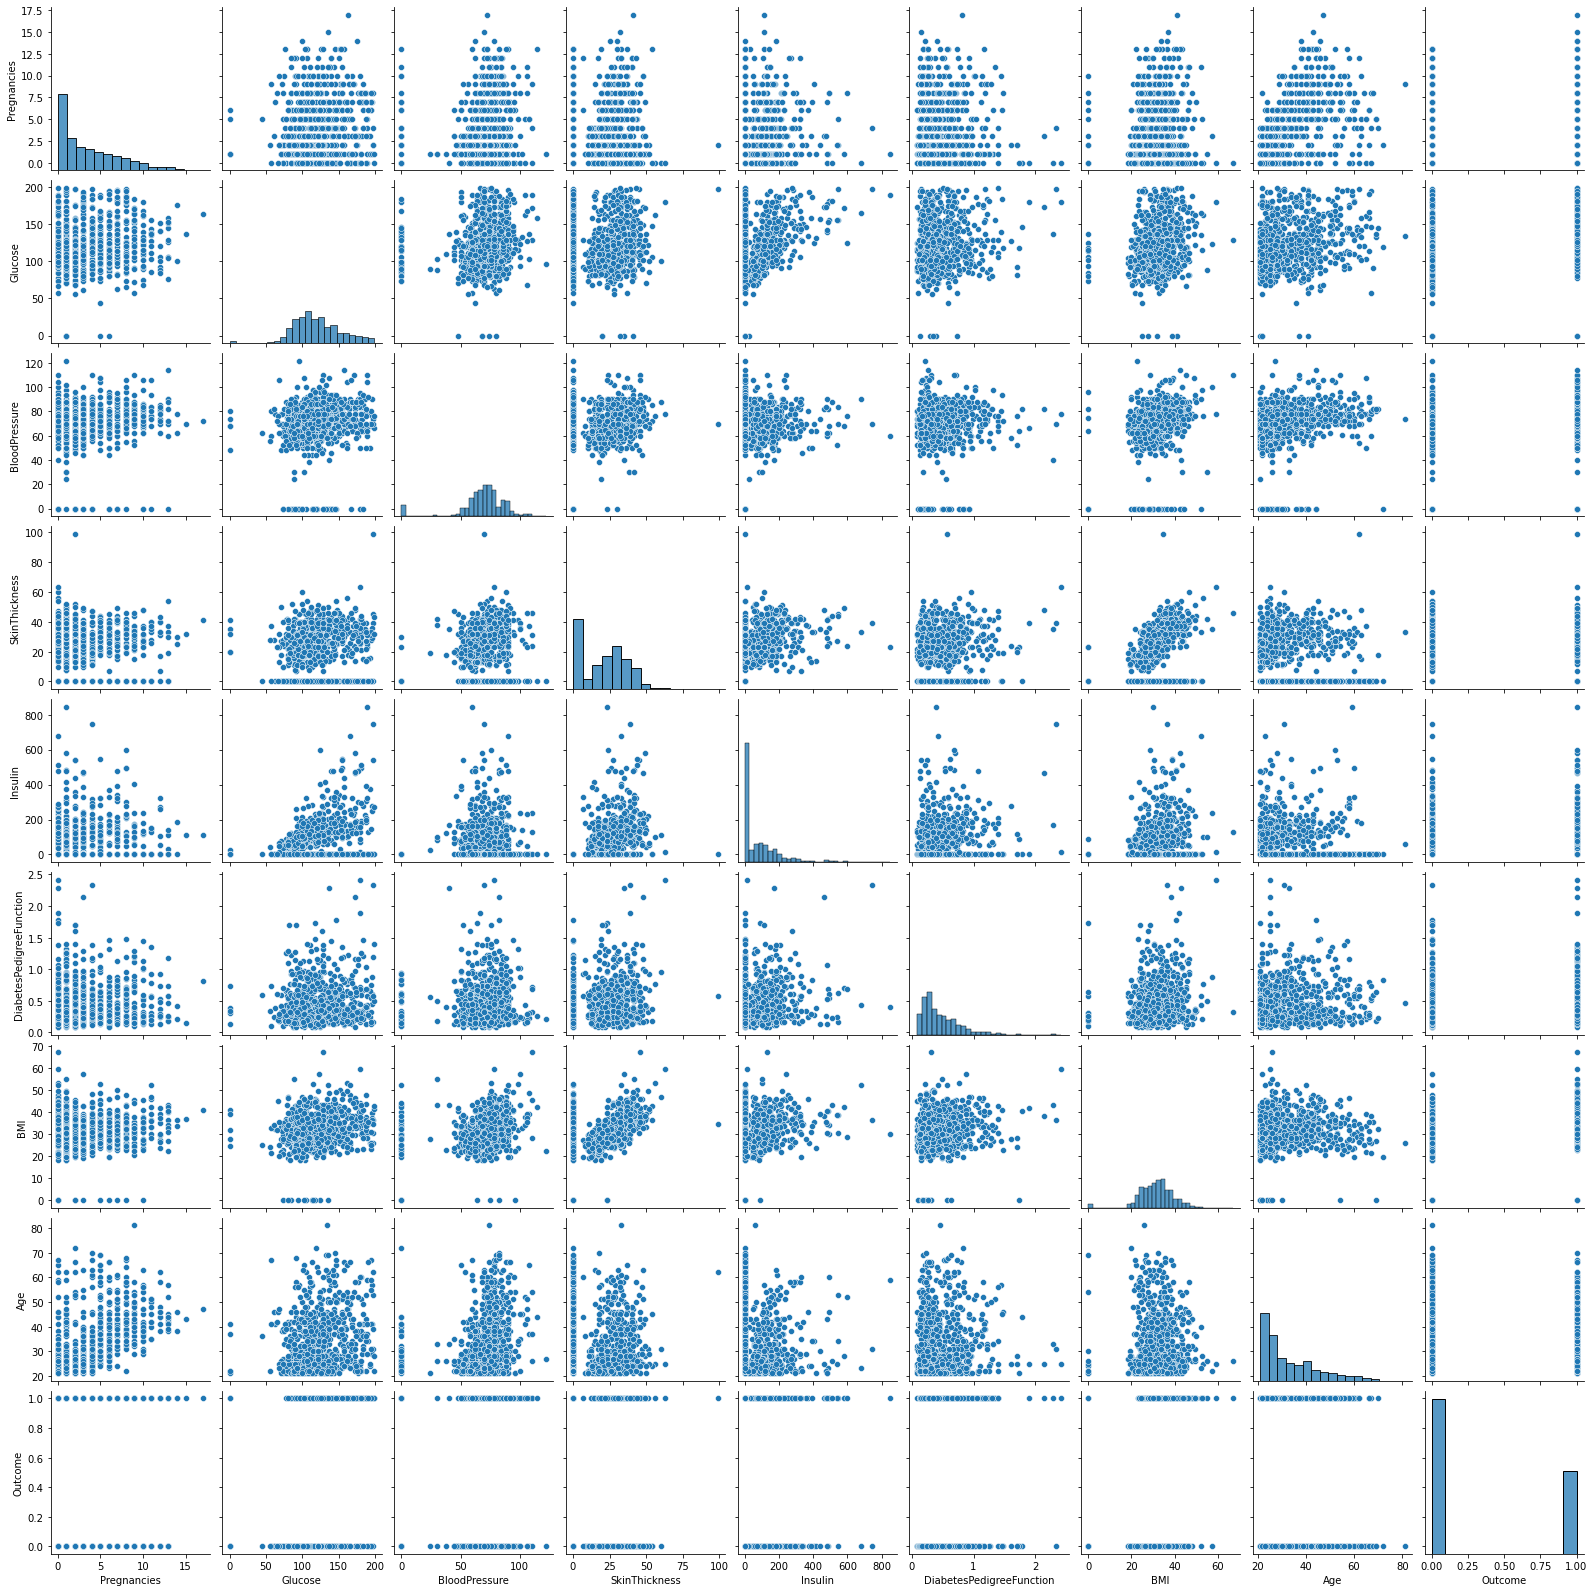

In [13]:
cols = ["Pregnancies" ,"Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "DiabetesPedigreeFunction", "BMI" , "Age", "Outcome" ]
sns.pairplot(data_set[cols])

# from above graphs we can easily see the relations between all the variables and we can try to find the insight from them

In [14]:
feature_cols = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" ,"DiabetesPedigreeFunction" , "BMI", "Age" ]
x = data_set[feature_cols]
display(x.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI,Age
0,6,148,72,35,0,0.627,33.6,50
1,1,85,66,29,0,0.351,26.6,31
2,8,183,64,0,0,0.672,23.3,32
3,1,89,66,23,94,0.167,28.1,21
4,0,137,40,35,168,2.288,43.1,33


In [15]:
y = data_set["Outcome"]

In [16]:
# check the shape of X
print(x.shape)
print ()
# check theshape of y
print(y.shape)

(768, 8)

(768,)


# Splitting X and y into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1) 
display(x_train.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI,Age
118,4,97,60,23,0,0.443,28.2,22
205,5,111,72,28,0,0.407,23.9,27
506,0,180,90,26,90,0.314,36.5,35
587,6,103,66,0,0,0.249,24.3,29
34,10,122,78,31,0,0.512,27.6,45


# Model Building
Simple Linear Regression

In [18]:
x_train.shape
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'BMI', 'Age'],
      dtype='object')

# Multiple regression model

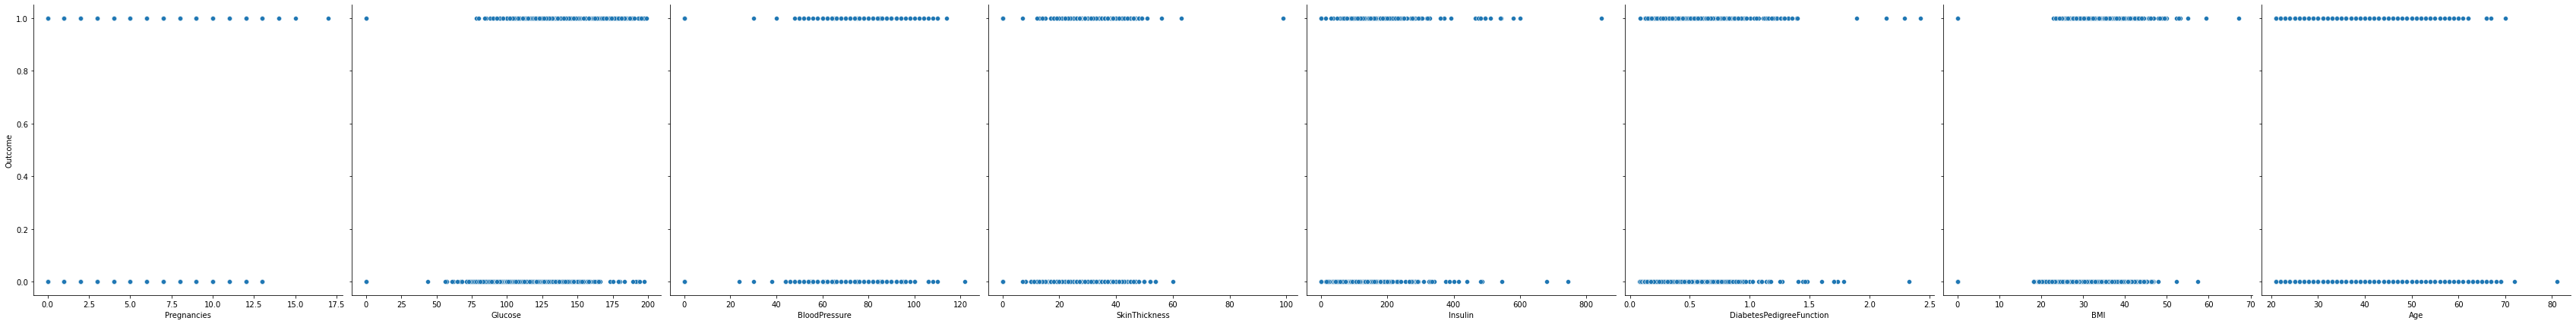

In [19]:
sns.pairplot(data_set, x_vars = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" ,"DiabetesPedigreeFunction" , "BMI", "Age" ], y_vars = 'Outcome', height = 6, aspect = 1, kind = 'scatter');

In [20]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data
linreg.fit(x_train, y_train)           # training the model on training data. 

# print the intercept and coeffients
print (round(linreg.intercept_,3)) # B0
print (np.round(linreg.coef_,3)) # B1, B2, B3

-0.847
[ 0.019  0.006 -0.002 -0.    -0.     0.103  0.014  0.002]


In [21]:
# pair the feature names with the coeffs
list(zip(feature_cols, np.round(linreg.coef_,3)))

[('Pregnancies', 0.019),
 ('Glucose', 0.006),
 ('BloodPressure', -0.002),
 ('SkinThickness', -0.0),
 ('Insulin', -0.0),
 ('DiabetesPedigreeFunction', 0.103),
 ('BMI', 0.014),
 ('Age', 0.002)]

# Making predictions

# we cannot predectict anything with this model it does not show any linear relation .

In [22]:
# Now we are going to apply logistics regression on given dataset

In [23]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI,Age
0,6,148,72,35,0,0.627,33.6,50
1,1,85,66,29,0,0.351,26.6,31
2,8,183,64,0,0,0.672,23.3,32
3,1,89,66,23,94,0.167,28.1,21
4,0,137,40,35,168,2.288,43.1,33


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Standardizing Age variable
Variables are standardized for a variety of reasons, for example, to make sure all variables contribute evenly to a scale when items are added together, or to make it easier to interpret results of a regression or other analysis.

In [25]:
x.Age.min(), x.Age.max(), x.Age.mean(), x.Age.std()

(21, 81, 33.240885416666664, 11.76023154067868)

In [26]:
# fit the model to the training data
model = LogisticRegression()
model.fit(x_train, y_train)

print (model.intercept_) # Bo
print ()
print ((np.round(model.coef_,5))) # Bi
print ()
print (x_train.columns)

[-8.15108675]

[[ 0.11747  0.03557 -0.01471 -0.00261 -0.00067  0.47319  0.09254  0.01393]]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'BMI', 'Age'],
      dtype='object')


In [27]:
#Model Interpretation 

In [28]:
model.coef_[0]
coeff = list(model.coef_[0])
coeff # Beta values

[0.11746558357020563,
 0.0355698155564961,
 -0.014711594251090605,
 -0.002612051701923653,
 -0.0006698869677152554,
 0.4731889932593918,
 0.09253979032330599,
 0.013928209991465362]

In [29]:
features = pd.DataFrame()
features

""


In [30]:
list(x_train.columns)
labels = list(x_train.columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'DiabetesPedigreeFunction',
 'BMI',
 'Age']

In [31]:
features['variables'] = labels # col names
features

,variables
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,DiabetesPedigreeFunction
6,BMI
7,Age


In [32]:
features['importance'] = coeff
features

,variables,importance
0,Pregnancies,0.117466
1,Glucose,0.035570
2,BloodPressure,-0.014712
3,SkinThickness,-0.002612
4,Insulin,-0.000670
5,DiabetesPedigreeFunction,0.473189
6,BMI,0.092540
7,Age,0.013928


In [33]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,variables,importance
2,BloodPressure,-0.014712
3,SkinThickness,-0.002612
4,Insulin,-0.000670
7,Age,0.013928
1,Glucose,0.035570
6,BMI,0.092540
0,Pregnancies,0.117466
5,DiabetesPedigreeFunction,0.473189


In [34]:
features['importance'] > 0
features['positive'] = features['importance'] > 0
features

,variables,importance,positive
2,BloodPressure,-0.014712,False
3,SkinThickness,-0.002612,False
4,Insulin,-0.000670,False
7,Age,0.013928,True
1,Glucose,0.035570,True
6,BMI,0.092540,True
0,Pregnancies,0.117466,True
5,DiabetesPedigreeFunction,0.473189,True


In [35]:
features.set_index('variables', inplace=True)
features

,importance,positive
variables,,
BloodPressure,-0.014712,False
SkinThickness,-0.002612,False
Insulin,-0.000670,False
Age,0.013928,True
Glucose,0.035570,True
BMI,0.092540,True
Pregnancies,0.117466,True
DiabetesPedigreeFunction,0.473189,True


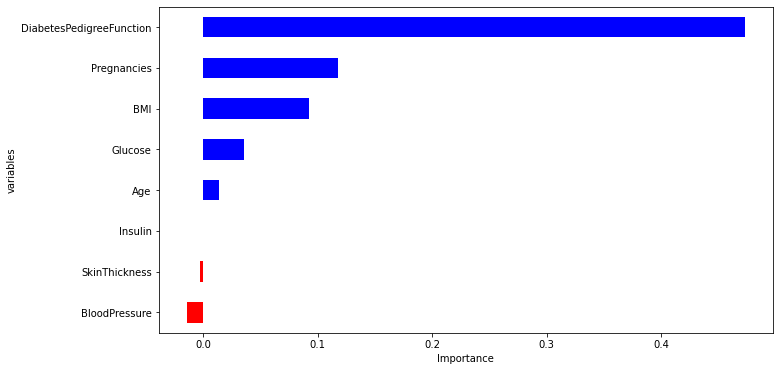

In [36]:
features.importance.plot(kind = 'barh', figsize=(11, 6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

# Predict function and Predictions

In [38]:
y_pred = model.predict(x_test) # class == 1,0
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
display (x_test[:5])
print ()
display (model.predict_proba(x_test)[:5]) # prob
print ()
display (model.predict(x_test)[:5]) # class

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI,Age
285,7,136,74,26,135,0.647,26.0,51
101,1,151,60,0,0,0.179,26.1,22
581,6,109,60,27,0,0.206,25.0,27
352,3,61,82,28,0,0.243,34.4,46
726,1,116,78,29,180,0.496,36.1,25


array([[0.57830333, 0.42169667],
       [0.67674755, 0.32325245],
       [0.85009815, 0.14990185],
       [0.95117093, 0.04882907],
       [0.79047031, 0.20952969]])

array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
model.predict_proba(x_test) # P(Y=0) P(Y=1)
model.predict_proba(x_test)[:,1] # P(Y=1)
model.predict_proba(x_test)[:,1]>0.5
model.predict_proba(x_test)[:,1]>0.6
model.predict_proba(x_test)[:,1]>0.4

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

# Model Validation

# Accuracy

In [41]:
# compute the accuracy of our predictions
from sklearn.metrics import accuracy_score
print ("Logistic testing accuracy is ", accuracy_score(y_test, model.predict(x_test)))

Logistic testing accuracy is  0.7760416666666666


# ROC Curve

In [42]:
from sklearn.metrics import roc_auc_score
# lets measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, model.predict(x_test)) # on test data
logistic_roc_auc

0.732944503358077

In [44]:
print (model.predict_proba(x_test)[:5])
print ()
print (model.predict_proba(x_test)[:,1][:5]) # P(Y=1)----- Prob of Diabeties
print ()
print (y_test[:5])

[[0.57830333 0.42169667]
 [0.67674755 0.32325245]
 [0.85009815 0.14990185]
 [0.95117093 0.04882907]
 [0.79047031 0.20952969]]

[0.42169667 0.32325245 0.14990185 0.04882907 0.20952969]

285    0
101    0
581    0
352    0
726    0
Name: Outcome, dtype: int64


In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

In [46]:
display (fpr[:10])
print ()
display (tpr[:10])
print ()
display (thresholds[:10])

array([0.        , 0.        , 0.        , 0.01626016, 0.01626016,
       0.03252033, 0.03252033, 0.04065041, 0.04065041, 0.04878049])

array([0.        , 0.01449275, 0.20289855, 0.20289855, 0.2173913 ,
       0.2173913 , 0.31884058, 0.31884058, 0.44927536, 0.44927536])

array([1.98054919, 0.98054919, 0.83853686, 0.77452796, 0.77125622,
       0.76617935, 0.74975337, 0.7406009 , 0.69808397, 0.69353923])

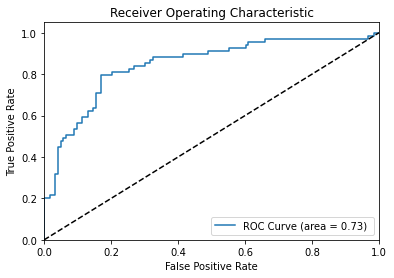

Logistic AUC = 0.73 


In [47]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f) ' % logistic_roc_auc) # 1-Specificity, Sensitivity
plt.plot([0,1],[0,1],'k--') # diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate") # 1-Specificity
plt.ylabel("True Positive Rate") # Sensitivity
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

print("Logistic AUC = %2.2f " % logistic_roc_auc )
